Tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best score for Decision Tree: 0.8235892616898255

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.821152088404145

Tuning Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.8182861426913558

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.8290336958642717

Evaluating Decision Tree...
              precision    recall  f1-score   support

       right       0.82      0.98      0.90      1431
       wrong       0.36      0.05      0.08       314

    accuracy                           0.81      1745
   macro avg       0.59      0.51      0.49      1745
weighted avg       0.74      0.81      0.75      1

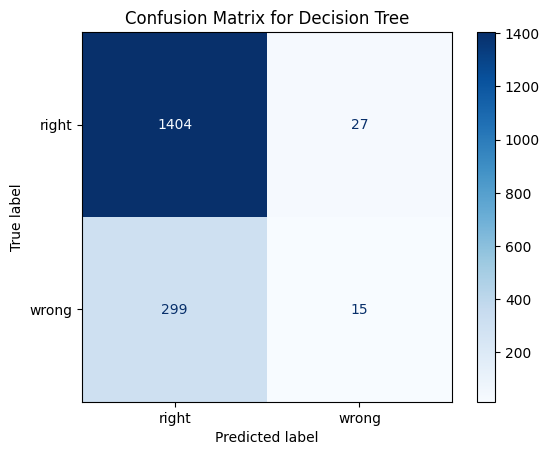

Evaluating Logistic Regression...
              precision    recall  f1-score   support

       right       0.82      1.00      0.90      1431
       wrong       0.33      0.01      0.01       314

    accuracy                           0.82      1745
   macro avg       0.58      0.50      0.46      1745
weighted avg       0.73      0.82      0.74      1745

ROC AUC Score for Logistic Regression: 0.59



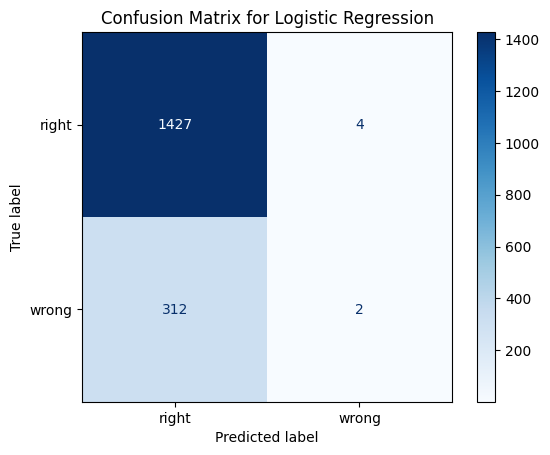

Evaluating Naive Bayes...
              precision    recall  f1-score   support

       right       0.83      0.98      0.90      1431
       wrong       0.45      0.08      0.14       314

    accuracy                           0.82      1745
   macro avg       0.64      0.53      0.52      1745
weighted avg       0.76      0.82      0.76      1745

ROC AUC Score for Naive Bayes: 0.61



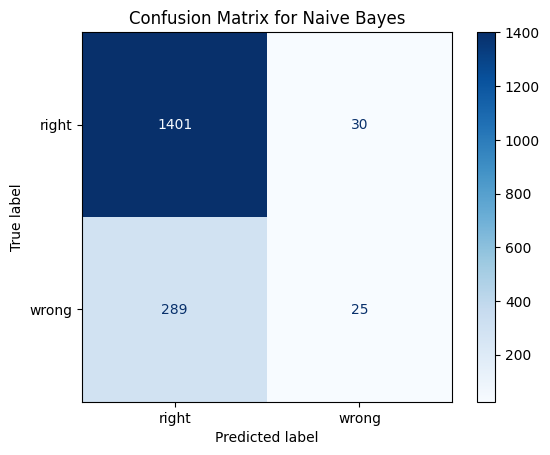

Evaluating Random Forest...
              precision    recall  f1-score   support

       right       0.83      0.98      0.90      1431
       wrong       0.50      0.09      0.15       314

    accuracy                           0.82      1745
   macro avg       0.67      0.53      0.53      1745
weighted avg       0.77      0.82      0.76      1745

ROC AUC Score for Random Forest: 0.65



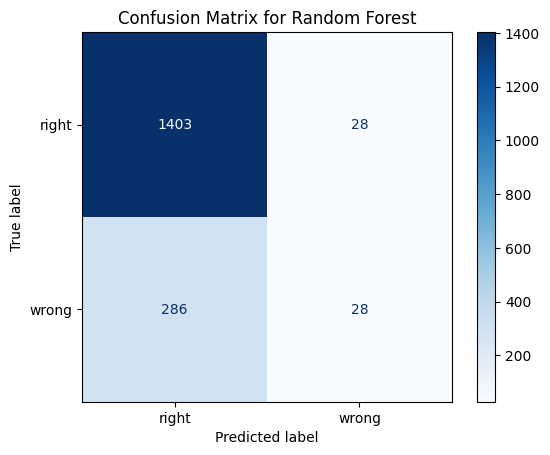

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load the data
data = pd.read_csv('Data1.csv')

# Separate features and target
X = data.drop(columns=['Rated_(T/F)', 'Winner', 'Game_Status'])
y = data['Rated_(T/F)']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (optional)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models and hyperparameters
models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier(), "params": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10], "criterion": ["gini", "entropy"]}},
    {"name": "Logistic Regression", "model": LogisticRegression(max_iter=1000), "params": {"penalty": ["l1", "l2"], "C": [0.1, 1, 10], "solver": ["liblinear"]}},
    {"name": "Naive Bayes", "model": GaussianNB(), "params": {"var_smoothing": [1e-9, 1e-8, 1e-7]}},
    {"name": "Random Forest", "model": RandomForestClassifier(), "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}},
    ]

# Perform grid search for each model
best_models = {}
for model in models:
    print(f"Tuning {model['name']}...")
    grid_search = GridSearchCV(model["model"], model["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model['name']] = grid_search.best_estimator_
    print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
    print(f"Best score for {model['name']}: {grid_search.best_score_}\n")

# Evaluate each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC AUC Score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score for {model_name}: {roc_auc:.2f}\n")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Rated Model Performance Analysis

## 1.  *Decision Tree:*
- **True Positives**: High accuracy for the rated class.
- **False Negatives**: Significant misclassification of other classes.
- **Overall Performance**: The model performs well for the rated class but struggles with others.

## 2.  *Logistic Regression:*
- **True Positives**: Good performance for the rated class.
- **False Negatives**: Notable misclassification of other classes.
- **Overall Performance**: Slightly less effective than the Decision Tree for the rated class.

## 3.  *Naive Bayes:*
- **True Positives**: Good performance for the rated class, but with more misclassifications for others.
- **Overall Performance**: Similar to Logistic Regression, but with a higher number of misclassifications.

## 4.  *Random Forest:*
- **True Positives**: Highest accuracy for the rated class.
- **False Negatives**: Misclassification of other classes is lower than in previous models.
- **Overall Performance**: This model appears to be the most balanced, with fewer misclassifications across all classes.

## Summary of Performance:
- **Best Performing Model**: Random Forest shows the best overall performance with the least misclassifications.
- **Common Misclassifications**: All models struggle with correctly predicting other classes, indicating a potential area for improvement.
- **Model Comparison**: Decision Tree and Random Forest generally outperform Logistic Regression and Naive Bayes in terms of true positives for the rated class.
